In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv("wafer.csv")
df.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [17]:
#Dropping Unnamed columns as its not necessary
df.drop(['Unnamed: 0'], axis =1 , inplace = True)

In [19]:
df.duplicated().sum()
# No duplicate values

0

In [9]:
(df.isnull().mean())*100

Sensor-1       1.0
Sensor-2       0.0
Sensor-3       3.0
Sensor-4       3.0
Sensor-5       3.0
Sensor-6       3.0
Sensor-7       3.0
Sensor-8       3.0
Sensor-9       0.0
Sensor-10      0.0
Sensor-11      0.0
Sensor-12      0.0
Sensor-13      0.0
Sensor-14      0.0
Sensor-15      0.0
Sensor-16      0.0
Sensor-17      0.0
Sensor-18      0.0
Sensor-19      0.0
Sensor-20      0.0
Sensor-21      0.0
Sensor-22      0.0
Sensor-23      0.0
Sensor-24      0.0
Sensor-25      0.0
Sensor-26      0.0
Sensor-27      0.0
Sensor-28      0.0
Sensor-29      0.0
Sensor-30      0.0
Sensor-31      0.0
Sensor-32      0.0
Sensor-33      0.0
Sensor-34      0.0
Sensor-35      0.0
Sensor-36      0.0
Sensor-37      0.0
Sensor-38      0.0
Sensor-39      0.0
Sensor-40      0.0
Sensor-41      2.0
Sensor-42      2.0
Sensor-43      0.0
Sensor-44      0.0
Sensor-45      0.0
Sensor-46      0.0
Sensor-47      0.0
Sensor-48      0.0
Sensor-49      0.0
Sensor-50      0.0
Sensor-51      0.0
Sensor-52      0.0
Sensor-53   

In [11]:
cols = []
for col in df.columns:
    if (df[col].isnull().sum()) > 35:
        df.drop([col], axis = 1 , inplace = True)
        cols.append(col)
len(cols)
df.shape 

(100, 563)

In [21]:
for col in df.columns:
    df[col] = df[col].fillna(df[col].median())

In [23]:
df.isnull().sum().sum()

0

In [25]:
numerical_cols = []
for col in df.columns[:-1]:
    if df[col].dtypes != "O": 
        numerical_cols.append(col)
len(numerical_cols)

590

In [27]:
columns_Zero_STD = []
for col in numerical_cols:
    if df[col].std() == 0:
        columns_Zero_STD.append(col)
len(columns_Zero_STD)

cols_to_drop = columns_Zero_STD
len(cols_to_drop)

122

In [29]:
df['Good/Bad'].value_counts(),df['Good/Bad'].isna().sum()

(Good/Bad
 -1    94
  1     6
 Name: count, dtype: int64,
 0)

In [115]:
# Divide x and y
x = df.drop(["Good/Bad"], axis = 1)
y = df['Good/Bad']

In [117]:
x.shape, y.shape

((100, 590), (100,))

In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state=1)

In [123]:
x_train.shape,x_test.shape,y_train.value_counts(),y_test.value_counts(),y_train.shape

((70, 590),
 (30, 590),
 Good/Bad
 -1    66
  1     4
 Name: count, dtype: int64,
 Good/Bad
 -1    28
  1     2
 Name: count, dtype: int64,
 (70,))

In [67]:
from imblearn.over_sampling import ADASYN
adasys = ADASYN(sampling_strategy={-1: 100, 1: 60}, random_state=42,n_neighbors=3)
x_train, y_train = adasys.fit_resample(x_train, y_train)

In [69]:
y_train

0     -1
1      1
2     -1
3     -1
4     -1
5     -1
6     -1
7     -1
8     -1
9     -1
10    -1
11    -1
12    -1
13    -1
14    -1
15     1
16    -1
17    -1
18    -1
19    -1
20    -1
21    -1
22    -1
23    -1
24    -1
25    -1
26    -1
27    -1
28    -1
29    -1
30    -1
31    -1
32    -1
33    -1
34    -1
35    -1
36    -1
37    -1
38    -1
39    -1
40    -1
41    -1
42    -1
43    -1
44    -1
45     1
46    -1
47    -1
48    -1
49    -1
50    -1
51    -1
52    -1
53    -1
54    -1
55    -1
56    -1
57    -1
58    -1
59    -1
60     1
61    -1
62    -1
63    -1
64    -1
65    -1
66    -1
67    -1
68    -1
69    -1
70    -1
71    -1
72    -1
73    -1
74    -1
75    -1
76    -1
77    -1
78    -1
79    -1
80    -1
81    -1
82    -1
83    -1
84    -1
85    -1
86    -1
87    -1
88    -1
89    -1
90    -1
91    -1
92    -1
93    -1
94    -1
95    -1
96    -1
97    -1
98    -1
99    -1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
1

In [73]:
x_train.shape,y_train.shape()

TypeError: 'tuple' object is not callable

In [37]:
from sklearn.preprocessing import RobustScaler
RobustScaler_1 = RobustScaler()

In [39]:
x_train = RobustScaler_1.fit_transform(x_train)
x_test = RobustScaler_1.transform(x_test)

In [43]:
x_test

array([[-1.54486689e-01, -1.69453968e-01,  3.23844747e-02, ...,
         1.89060559e-01,  0.00000000e+00, -1.95274192e-01],
       [-2.31175553e-01, -3.76276774e-01,  6.23842588e-01, ...,
        -3.00294145e-02, -8.73475266e-02,  4.99131286e-01],
       [-5.50214876e-02, -3.68315536e-01,  5.97175542e-01, ...,
         5.92186111e-01,  5.53201002e-01,  1.13457491e+00],
       ...,
       [-9.78614738e-01, -4.04369738e+00, -2.57112842e-02, ...,
         2.59169351e-01,  5.24085160e-01, -8.20550551e-04],
       [-7.05128088e-01,  3.75975544e-01, -4.66210429e-01, ...,
         1.20563804e+00,  1.48490795e+00,  2.31104723e+00],
       [ 3.36014945e-01,  4.92006356e-01, -3.52873339e-01, ...,
         1.36338282e+00,  1.42667627e+00,  7.05500130e-02]])

In [131]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [151]:
models = { "LR" : LogisticRegressionCV(),
          "SVC" : SVC(kernel='linear'),
          "LSVC" : LinearSVC(),
          "RFC" : RandomForestClassifier(),
          "ABC" : AdaBoostClassifier(),
          "GBC" : GradientBoostingClassifier(),
          #"XGBC" : XGBClassifier(),
          "DTC" : DecisionTreeClassifier(),
          "GNB" : GaussianNB()
         }

In [147]:
GBC = GradientBoostingClassifier()

In [159]:
GradientBoostingClassifier.oob_score_

AttributeError: type object 'GradientBoostingClassifier' has no attribute 'oob_score_'

In [153]:
kf = KFold(n_splits = 4, shuffle=True, random_state=1) 

Scores [ 94.44444444  88.88888889 100.          70.58823529]
Mean Score 0.8848039215686274
              precision    recall  f1-score   support

          -1       0.93      0.96      0.95        28
           1       0.00      0.00      0.00         2

    accuracy                           0.90        30
   macro avg       0.47      0.48      0.47        30
weighted avg       0.87      0.90      0.88        30

 fpr [0.         0.03571429 1.        ], tpr [0. 0. 1.], threshold [inf  1. -1.]
AUC Score 0.48214285714285715
Model Score 0.48214285714285715
Accuracy score of LogisticRegressionCV() is 48.214285714285715


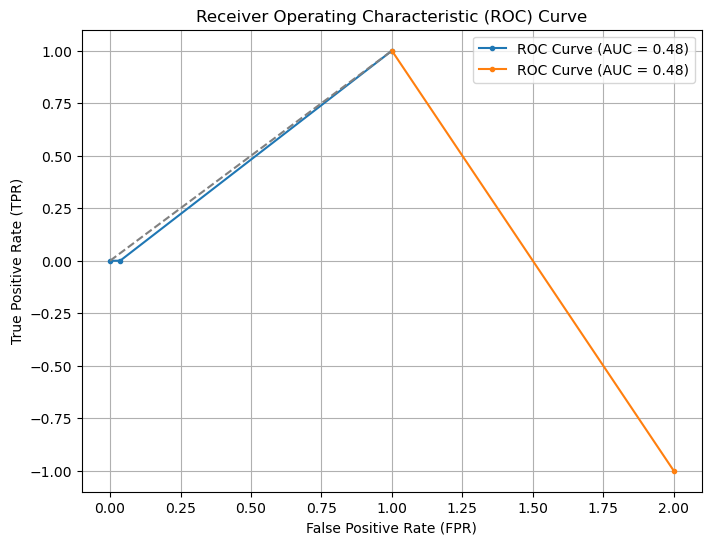

***********************************
Scores [ 88.88888889  88.88888889 100.          52.94117647]
Mean Score 0.826797385620915
              precision    recall  f1-score   support

          -1       0.93      0.96      0.95        28
           1       0.00      0.00      0.00         2

    accuracy                           0.90        30
   macro avg       0.47      0.48      0.47        30
weighted avg       0.87      0.90      0.88        30

 fpr [0.         0.03571429 1.        ], tpr [0. 0. 1.], threshold [inf  1. -1.]
AUC Score 0.48214285714285715
Model Score 0.48214285714285715
Accuracy score of SVC(kernel='linear') is 48.214285714285715


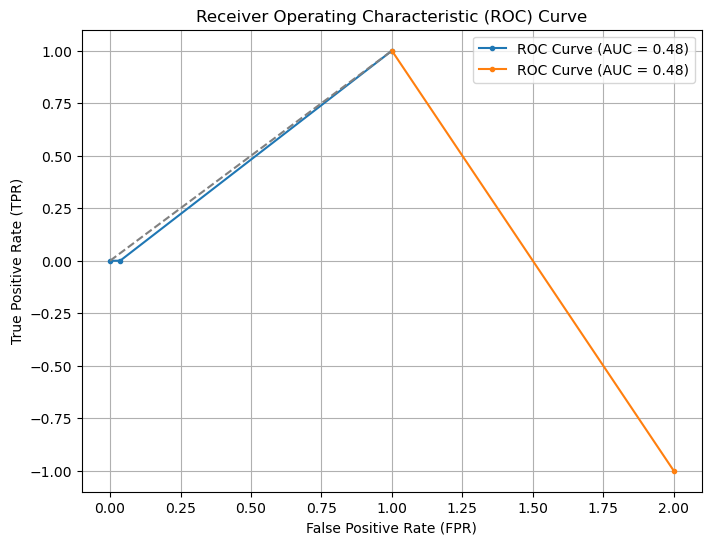

***********************************
Scores [100.          88.88888889 100.          47.05882353]
Mean Score 0.8398692810457516
              precision    recall  f1-score   support

          -1       0.93      0.96      0.95        28
           1       0.00      0.00      0.00         2

    accuracy                           0.90        30
   macro avg       0.47      0.48      0.47        30
weighted avg       0.87      0.90      0.88        30

 fpr [0.         0.03571429 1.        ], tpr [0. 0. 1.], threshold [inf  1. -1.]
AUC Score 0.48214285714285715
Model Score 0.48214285714285715
Accuracy score of LinearSVC() is 48.214285714285715


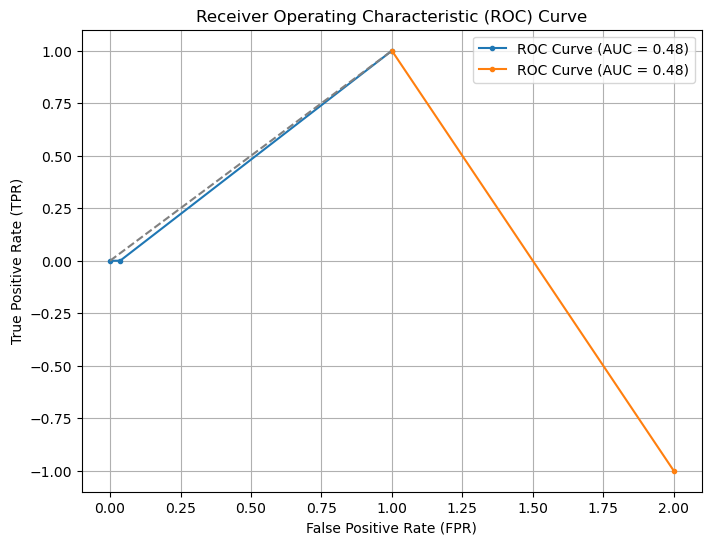

***********************************
Scores [ 94.44444444  94.44444444 100.          88.23529412]
Mean Score 0.9428104575163399
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97        28
           1       0.00      0.00      0.00         2

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30

 fpr [0. 1.], tpr [0. 1.], threshold [inf -1.]
AUC Score 0.5
Model Score 0.5
Accuracy score of RandomForestClassifier() is 50.0


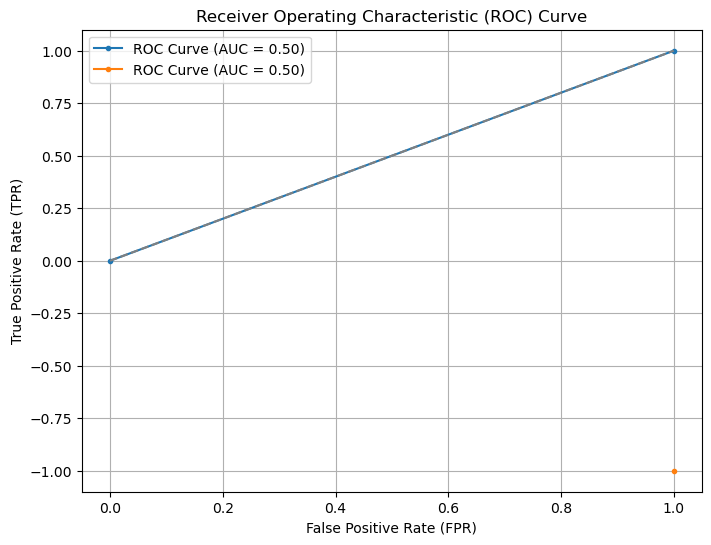

***********************************
Scores [ 94.44444444  94.44444444 100.          88.23529412]
Mean Score 0.9428104575163399
              precision    recall  f1-score   support

          -1       0.93      0.96      0.95        28
           1       0.00      0.00      0.00         2

    accuracy                           0.90        30
   macro avg       0.47      0.48      0.47        30
weighted avg       0.87      0.90      0.88        30

 fpr [0.         0.03571429 1.        ], tpr [0. 0. 1.], threshold [inf  1. -1.]
AUC Score 0.48214285714285715
Model Score 0.48214285714285715
Accuracy score of AdaBoostClassifier() is 48.214285714285715


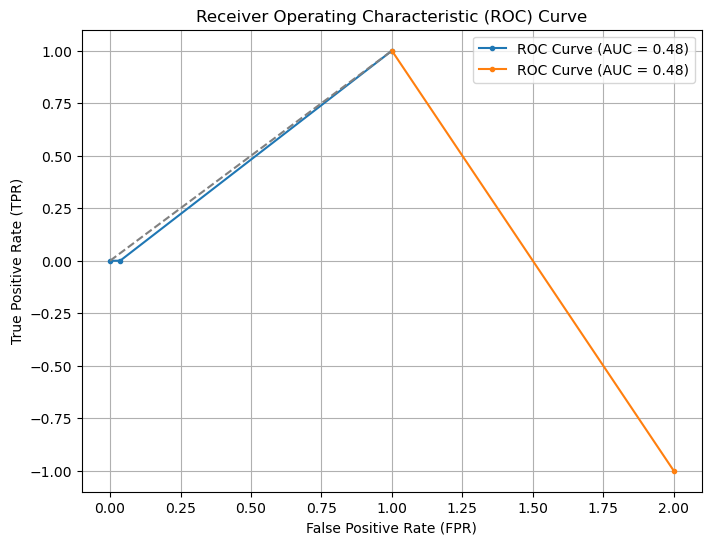

***********************************
Scores [ 94.44444444  94.44444444 100.          88.23529412]
Mean Score 0.9428104575163399
              precision    recall  f1-score   support

          -1       0.93      0.96      0.95        28
           1       0.00      0.00      0.00         2

    accuracy                           0.90        30
   macro avg       0.47      0.48      0.47        30
weighted avg       0.87      0.90      0.88        30

 fpr [0.         0.03571429 1.        ], tpr [0. 0. 1.], threshold [inf  1. -1.]
AUC Score 0.48214285714285715
Model Score 0.48214285714285715
Accuracy score of GradientBoostingClassifier() is 48.214285714285715


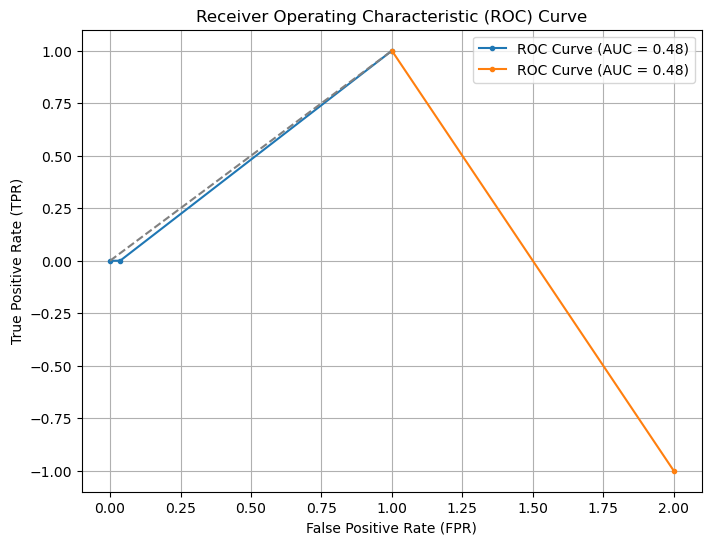

***********************************
Scores [ 88.88888889  94.44444444 100.          88.23529412]
Mean Score 0.9289215686274509
              precision    recall  f1-score   support

          -1       0.93      0.93      0.93        28
           1       0.00      0.00      0.00         2

    accuracy                           0.87        30
   macro avg       0.46      0.46      0.46        30
weighted avg       0.87      0.87      0.87        30

 fpr [0.         0.07142857 1.        ], tpr [0. 0. 1.], threshold [inf  1. -1.]
AUC Score 0.4642857142857143
Model Score 0.4642857142857143
Accuracy score of DecisionTreeClassifier() is 46.42857142857143


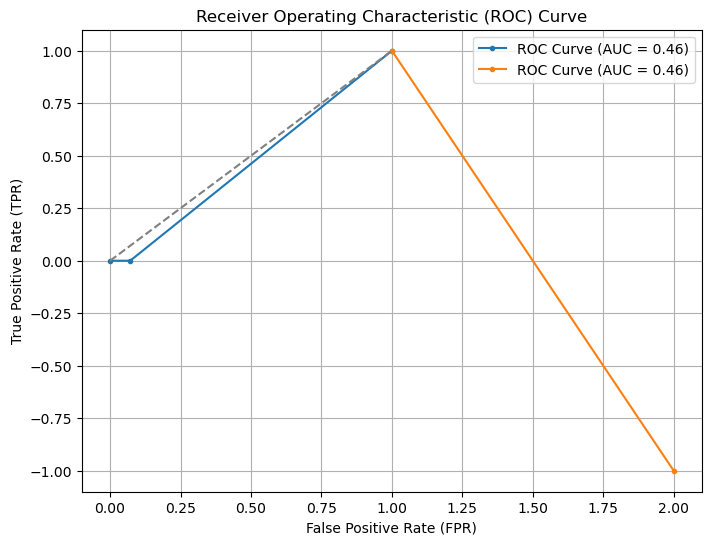

***********************************
Scores [ 94.44444444  94.44444444 100.          88.23529412]
Mean Score 0.9428104575163399
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97        28
           1       0.00      0.00      0.00         2

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30

 fpr [0. 1.], tpr [0. 1.], threshold [inf -1.]
AUC Score 0.5
Model Score 0.5
Accuracy score of GaussianNB() is 50.0


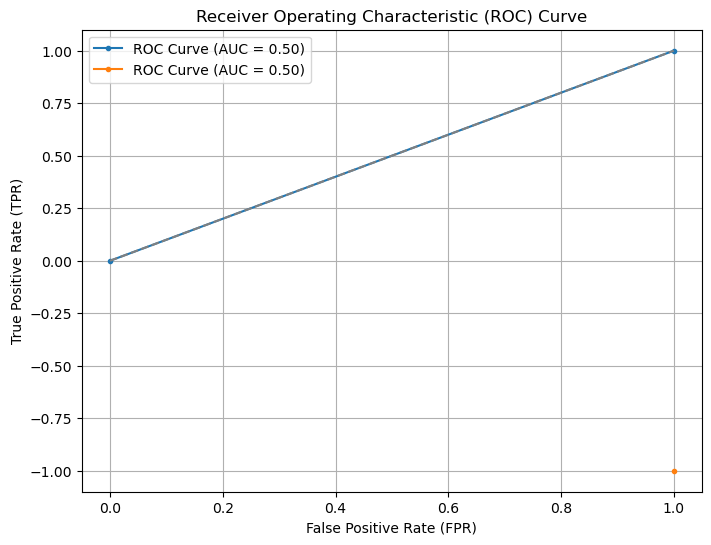

***********************************
Scores [61.11111111 72.22222222 58.82352941 58.82352941]
Mean Score 0.627450980392157
              precision    recall  f1-score   support

          -1       1.00      0.39      0.56        28
           1       0.11      1.00      0.19         2

    accuracy                           0.43        30
   macro avg       0.55      0.70      0.38        30
weighted avg       0.94      0.43      0.54        30

 fpr [0.         0.60714286 1.        ], tpr [0. 1. 1.], threshold [inf  1. -1.]
AUC Score 0.6964285714285714
Model Score 0.6964285714285714
Accuracy score of BalancedRandomForestClassifier() is 69.64285714285714


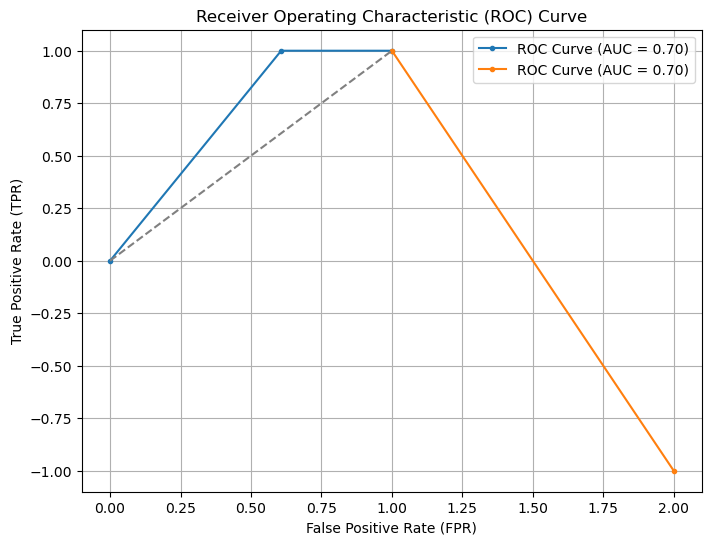

***********************************
Model with highest auc score  is -> 69.64285714285714. Model name is BRFC


In [155]:
# from sklearn.metrics import roc_curve, roc_auc_score
model_list = []
report = []
for i in range(len(models)):
    model = (list(models.values())[i])
    scores = cross_val_score(model, x_train, y_train, cv = kf)
    print("Scores", scores * 100)
    print("Mean Score", np.mean(scores))
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test,y_pred))
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)
    model_score = accuracy_score(y_test,y_pred)
    print(f" fpr {fpr}, tpr {tpr}, threshold {thresholds}")
    print("AUC Score", auc_score)
    print("Model Score", auc_score)
    print(f"Accuracy score of {model} is {auc_score * 100}")
    report.append(auc_score*100)
    model_list.append(list(models.keys())[i])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr,thresholds, marker='.', label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid()
    plt.show()
    print("*"*35)

print(f"Model with highest auc score  is -> {max(report)}. Model name is {model_list[report.index(max(sorted(report)))]}")

# Using PCA

In [99]:
from sklearn.decomposition import PCA

In [103]:
x_train.shape,x_test.shape,y_train.value_counts(),y_test.value_counts()

((156, 562),
 (30, 562),
 Good/Bad
 -1    96
  1    60
 Name: count, dtype: int64,
 Good/Bad
 -1    28
  1     2
 Name: count, dtype: int64)

In [105]:
pca = PCA(n_components=0.95)  # Reduce to 2 componentsx_train.shape,x_test.shape,y_train.value_counts(),y_test.value_counts()
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [107]:

# Step 3: Check explained variance ratio
print("Explained explained variance: ", pca.explained_variance_ratio_)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative explained variance: ", cumulative_variance)

n_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of components to retain 95% variance: ", n_components)

Explained explained variance:  [0.76736503 0.11222852 0.10741266]
Cumulative explained variance:  [0.76736503 0.87959355 0.98700621]
Number of components to retain 95% variance:  3


In [119]:
# Step 4: View transformed data
x_train_pca = pd.DataFrame(x_train_pca, columns=['PC1', 'PC2',"PC3",])
x_train_pca.head()

,PC1,PC2,PC3
0,727.045913,-6.175554,10.718933
1,-91.790039,8.605777,-18.813470
2,707.726635,-2.981975,7.973469
3,-110.035480,601.857098,786.552322
4,-91.436961,11.619139,-21.242081


In [135]:
models_1 = { "LR" : LogisticRegressionCV(),
          "SVC" : SVC(kernel='linear'),
          "LSVC" : LinearSVC(),
          "RFC" : RandomForestClassifier(),
          "ABC" : AdaBoostClassifier(),
          "GBC" : GradientBoostingClassifier(),
          #"XGBC" : XGBClassifier(),
          "DTC" : DecisionTreeClassifier(),
          "GNB" : GaussianNB()
         }

Scores [87.17948718 97.43589744 97.43589744 84.61538462]
Mean Score 0.9166666666666667
              precision    recall  f1-score   support

          -1       0.95      0.75      0.84        28
           1       0.12      0.50      0.20         2

    accuracy                           0.73        30
   macro avg       0.54      0.62      0.52        30
weighted avg       0.90      0.73      0.80        30

 fpr [0.   0.25 1.  ], tpr [0.  0.5 1. ], threshold [inf  1. -1.]
AUC Score 0.625
Model Score 0.625
Accuracy score of LogisticRegressionCV() is 62.5


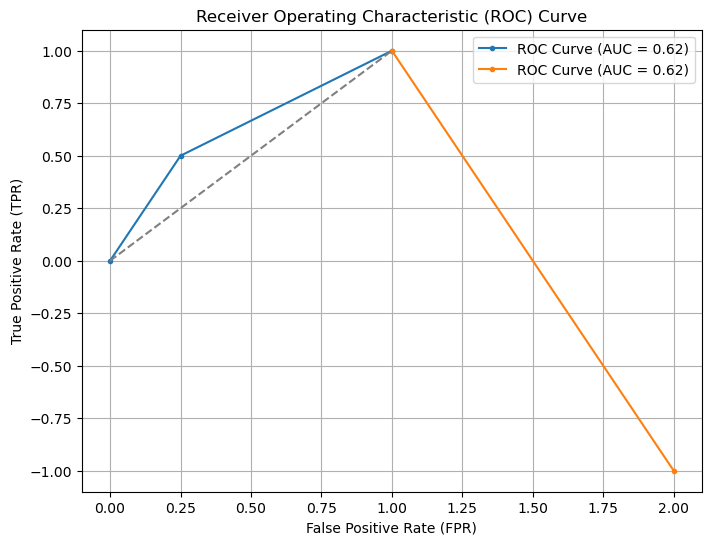

***********************************
Scores [82.05128205 87.17948718 82.05128205 82.05128205]
Mean Score 0.8333333333333333
              precision    recall  f1-score   support

          -1       1.00      0.82      0.90        28
           1       0.29      1.00      0.44         2

    accuracy                           0.83        30
   macro avg       0.64      0.91      0.67        30
weighted avg       0.95      0.83      0.87        30

 fpr [0.         0.17857143 1.        ], tpr [0. 1. 1.], threshold [inf  1. -1.]
AUC Score 0.9107142857142857
Model Score 0.9107142857142857
Accuracy score of SVC(kernel='linear') is 91.07142857142857


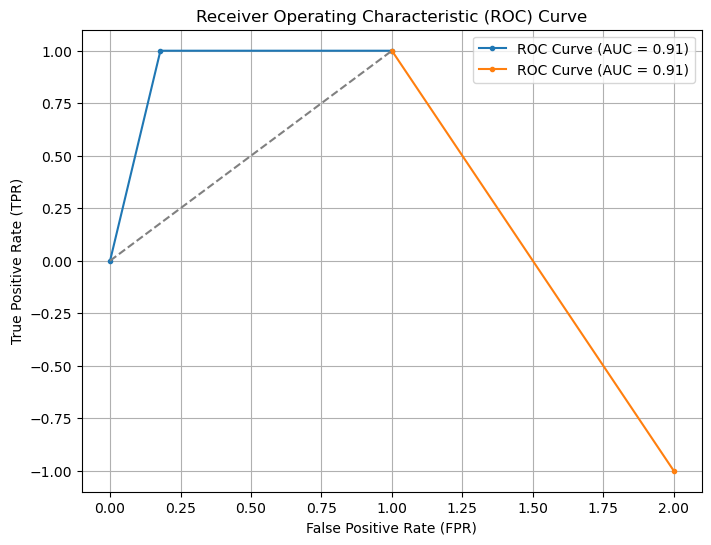

***********************************
Scores [64.1025641  64.1025641  46.15384615 51.28205128]
Mean Score 0.5641025641025641
              precision    recall  f1-score   support

          -1       1.00      0.39      0.56        28
           1       0.11      1.00      0.19         2

    accuracy                           0.43        30
   macro avg       0.55      0.70      0.38        30
weighted avg       0.94      0.43      0.54        30

 fpr [0.         0.60714286 1.        ], tpr [0. 1. 1.], threshold [inf  1. -1.]
AUC Score 0.6964285714285714
Model Score 0.6964285714285714
Accuracy score of LinearSVC() is 69.64285714285714


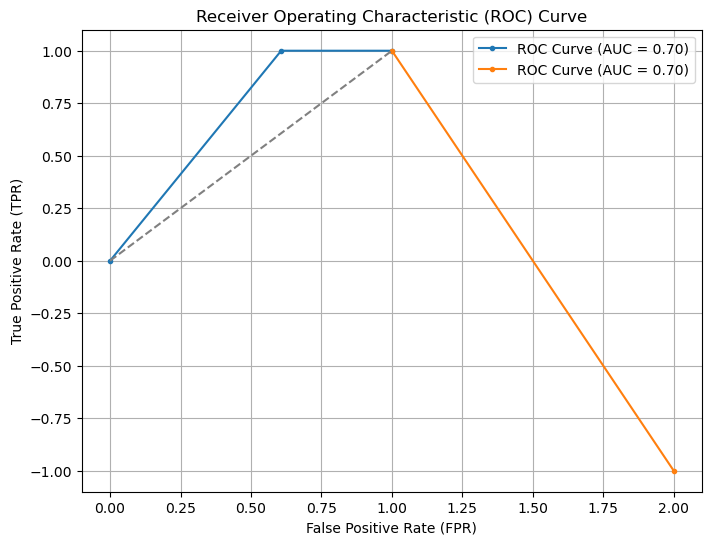

***********************************
Scores [100.         100.          97.43589744  94.87179487]
Mean Score 0.9807692307692308
              precision    recall  f1-score   support

          -1       0.97      1.00      0.98        28
           1       1.00      0.50      0.67         2

    accuracy                           0.97        30
   macro avg       0.98      0.75      0.82        30
weighted avg       0.97      0.97      0.96        30

 fpr [0. 0. 1.], tpr [0.  0.5 1. ], threshold [inf  1. -1.]
AUC Score 0.75
Model Score 0.75
Accuracy score of RandomForestClassifier() is 75.0


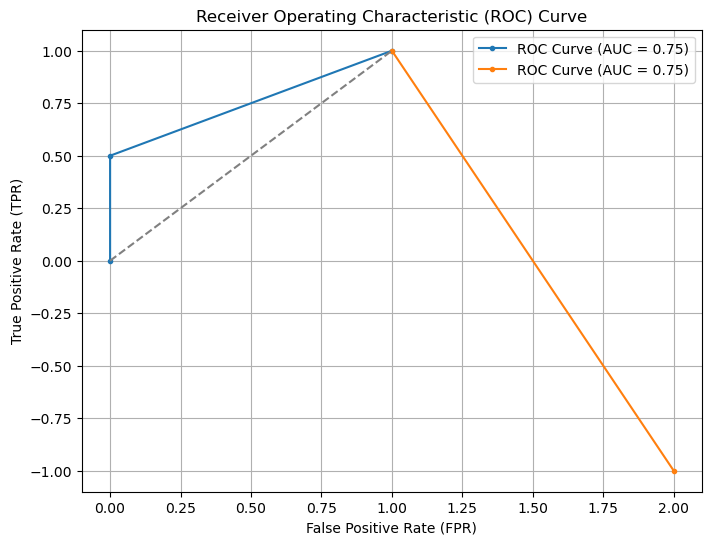

***********************************
Scores [100.         100.          97.43589744  94.87179487]
Mean Score 0.9807692307692308
              precision    recall  f1-score   support

          -1       0.97      1.00      0.98        28
           1       1.00      0.50      0.67         2

    accuracy                           0.97        30
   macro avg       0.98      0.75      0.82        30
weighted avg       0.97      0.97      0.96        30

 fpr [0. 0. 1.], tpr [0.  0.5 1. ], threshold [inf  1. -1.]
AUC Score 0.75
Model Score 0.75
Accuracy score of AdaBoostClassifier() is 75.0


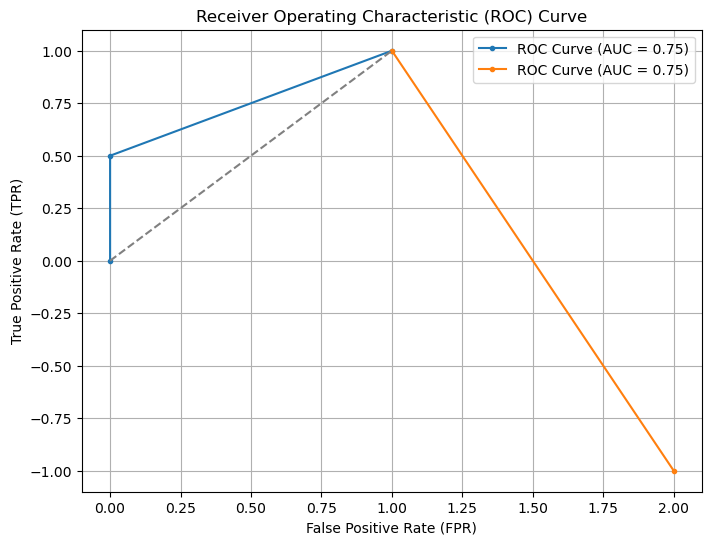

***********************************
Scores [100.         100.         100.          94.87179487]
Mean Score 0.9871794871794872
              precision    recall  f1-score   support

          -1       0.97      1.00      0.98        28
           1       1.00      0.50      0.67         2

    accuracy                           0.97        30
   macro avg       0.98      0.75      0.82        30
weighted avg       0.97      0.97      0.96        30

 fpr [0. 0. 1.], tpr [0.  0.5 1. ], threshold [inf  1. -1.]
AUC Score 0.75
Model Score 0.75
Accuracy score of GradientBoostingClassifier() is 75.0


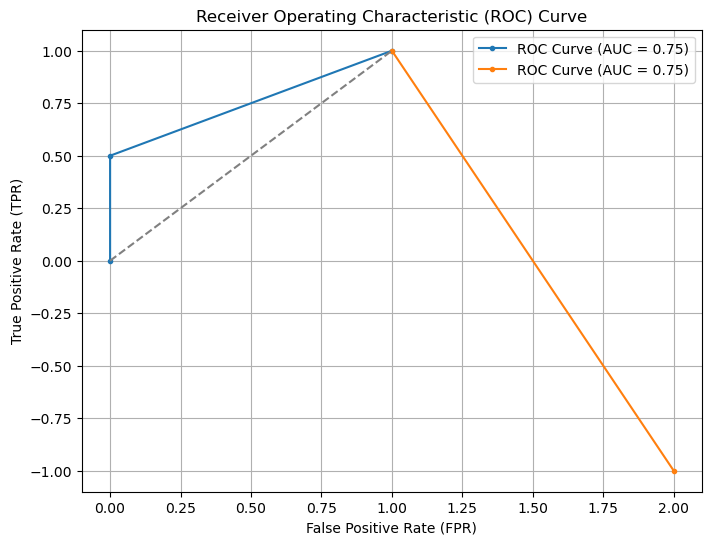

***********************************
Scores [100.         100.         100.          94.87179487]
Mean Score 0.9871794871794872
              precision    recall  f1-score   support

          -1       0.97      1.00      0.98        28
           1       1.00      0.50      0.67         2

    accuracy                           0.97        30
   macro avg       0.98      0.75      0.82        30
weighted avg       0.97      0.97      0.96        30

 fpr [0. 0. 1.], tpr [0.  0.5 1. ], threshold [inf  1. -1.]
AUC Score 0.75
Model Score 0.75
Accuracy score of DecisionTreeClassifier() is 75.0


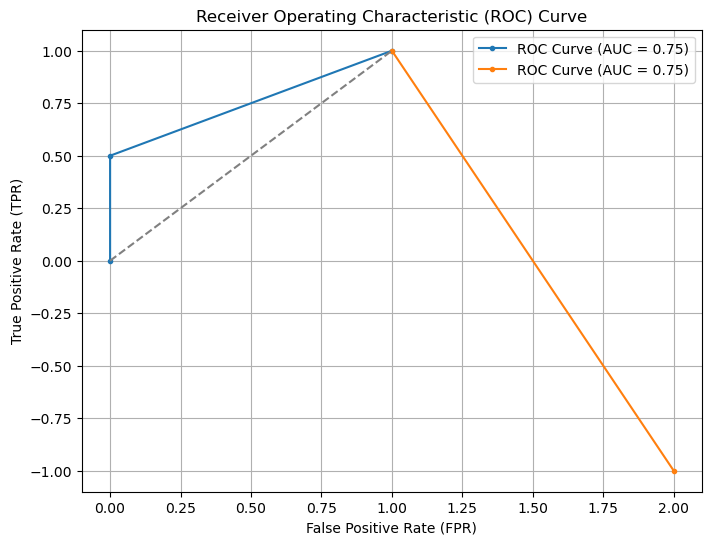

***********************************
Scores [87.17948718 82.05128205 84.61538462 89.74358974]
Mean Score 0.8589743589743589
              precision    recall  f1-score   support

          -1       1.00      0.75      0.86        28
           1       0.22      1.00      0.36         2

    accuracy                           0.77        30
   macro avg       0.61      0.88      0.61        30
weighted avg       0.95      0.77      0.82        30

 fpr [0.   0.25 1.  ], tpr [0. 1. 1.], threshold [inf  1. -1.]
AUC Score 0.875
Model Score 0.875
Accuracy score of GaussianNB() is 87.5


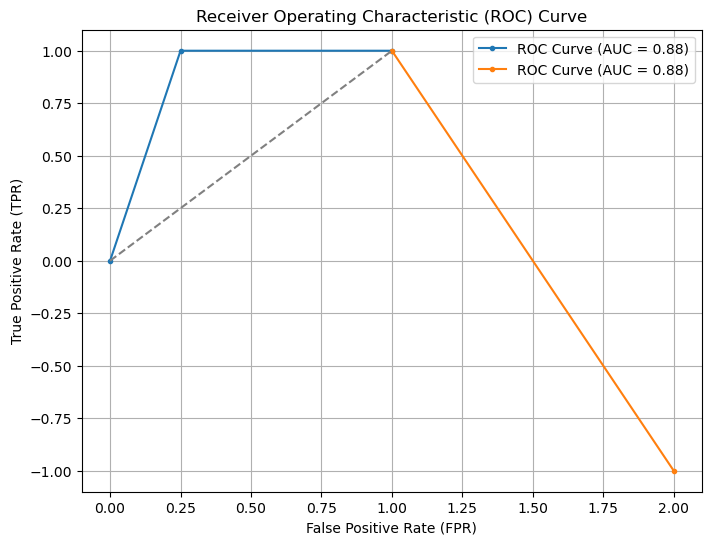

***********************************
Model with highest auc score  is -> 91.07142857142857. Model name is SVC


In [139]:
model_list = []
report = []
for i in range(len(models_1)):
    model = (list(models.values())[i])
    scores = cross_val_score(model, x_train_pca, y_train, cv = kf)
    print("Scores", scores * 100)
    print("Mean Score", np.mean(scores))
    model.fit(x_train_pca,y_train)
    y_pred = model.predict(x_test_pca)
    print(classification_report(y_test,y_pred))
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    auc_score = roc_auc_score(y_test,y_pred)
    model_score = accuracy_score(y_test,y_pred)
    print(f" fpr {fpr}, tpr {tpr}, threshold {thresholds}")
    print("AUC Score", auc_score)
    print("Model Score", auc_score)
    print(f"Accuracy score of {model} is {auc_score * 100}")
    report.append(auc_score*100)
    model_list.append(list(models_1.keys())[i])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr,thresholds, marker='.', label=f'ROC Curve (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid()
    plt.show()
    print("*"*35)

print(f"Model with highest auc score  is -> {max(report)}. Model name is {model_list[report.index(max(sorted(report)))]}")

In [55]:
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps = [('RobustScaler', RobustScaler())])
preprocessor = ColumnTransformer([('num_pipeline',pipeline,x.columns)
                                             ])

In [57]:
pipeline.named_steps  

{'RobustScaler': RobustScaler()}

In [ ]:
from imblearn.over_sampling import ADASYN
adasys = ADASYN(sampling_strategy={-1: 100, 1: 60}, random_state=42,n_neighbors=3)
x_train, y_train = adasys.fit_resample(x_train, y_train)